# Importando a Base de Dados

In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('tips.csv')
dados.head(10)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [5]:
dados.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Renomendo Colunlas e Valores

In [6]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [7]:
renomear = {'total_bill': 'valor_da_conta',
           'tip': 'gorjeta',
           'dessert': 'sobremesa',
           'day': 'dia',
           'time': 'periodo',
           'size': 'total_de_pessoas'}

In [8]:
# Atribuindo a base de dadose em uma nova variável e renomeando as columnas definida no dict renomear
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [10]:
# Visuliszando todos os tipos na coluna 'sobremesa'
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {'No': 'Não',
           'Yes': 'Sim'}

In [12]:
# mapeando valores na coluna 'sobremesa', retorna os valores definidos em 'sim_nao'
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
# Substiruindo os valores com sim e não
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [14]:
# Retorna tuplas aleatórias para verificarmos se ocorreu tudo bem com a substituição
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
205,16.47,3.23,Sim,Thur,Lunch,3
63,18.29,3.76,Sim,Sat,Dinner,4
0,16.99,1.01,Não,Sun,Dinner,2
129,22.82,2.18,Não,Thur,Lunch,3
111,7.25,1.00,Não,Sat,Dinner,1
158,13.39,2.61,Não,Sun,Dinner,2
61,13.81,2.00,Sim,Sat,Dinner,2
194,16.58,4.00,Sim,Thur,Lunch,2
127,14.52,2.00,Não,Thur,Lunch,2
230,24.01,2.00,Sim,Sat,Dinner,4


In [15]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [16]:
dias_da_semana = {'Sun': 'Domingo',
                  'Sat': 'Sábado',
                  'Thur': 'Quinta',
                  'Fri': 'Sexta'}

In [17]:
gorjetas.dia.map(dias_da_semana)

0      Domingo
1      Domingo
2      Domingo
3      Domingo
4      Domingo
        ...   
239     Sábado
240     Sábado
241     Sábado
242     Sábado
243     Quinta
Name: dia, Length: 244, dtype: object

In [18]:
gorjetas.dia = gorjetas.dia.map(dias_da_semana)

In [19]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
198,13.00,2.00,Sim,Quinta,Lunch,2
31,18.35,2.50,Não,Sábado,Dinner,4
218,7.74,1.44,Sim,Sábado,Dinner,2
58,11.24,1.76,Sim,Sábado,Dinner,2
108,18.24,3.76,Não,Sábado,Dinner,2
88,24.71,5.85,Não,Quinta,Lunch,2
86,13.03,2.00,Não,Quinta,Lunch,2
114,25.71,4.00,Não,Domingo,Dinner,3
43,9.68,1.32,Não,Domingo,Dinner,2
223,15.98,3.00,Não,Sexta,Lunch,3


In [20]:
gorjetas.periodo.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
periodo = {'Dinner': 'Jantar',
          'Lunch': 'Almoço'}

In [22]:
gorjetas.periodo = gorjetas.periodo.map(periodo)

In [23]:
gorjetas.sample(10)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
237,32.83,1.17,Sim,Sábado,Jantar,2
0,16.99,1.01,Não,Domingo,Jantar,2
48,28.55,2.05,Não,Domingo,Jantar,3
200,18.71,4.00,Sim,Quinta,Almoço,3
228,13.28,2.72,Não,Sábado,Jantar,2
137,14.15,2.00,Não,Quinta,Almoço,2
163,13.81,2.00,Não,Domingo,Jantar,2
34,17.78,3.27,Não,Sábado,Jantar,2
63,18.29,3.76,Sim,Sábado,Jantar,4
19,20.65,3.35,Não,Sábado,Jantar,3


# Visualização de dados com seaborn

In [24]:
import seaborn as sns

In [25]:
!pip show seaborn

Name: seaborn
Version: 0.10.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\dorivan\anaconda3\lib\site-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: 


## Análise I: Valor da conta e gorjeta

In [26]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'periodo',
       'total_de_pessoas'],
      dtype='object')

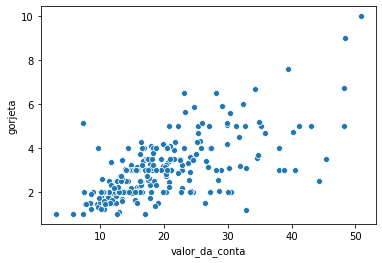

In [27]:
# Visualiza se de acordo com o aumento da conta a gorjeta também  aumenta, 3 parâmetros eixo X, Y e a base de dados
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente, o valor da gonjeta aumenta conforme aumenta o valor da conta**

In [28]:
# Verificando se existe valores nulos
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia               244 non-null    object 
 4   periodo           244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


# Criando o campo porcentagem

In [29]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [44]:
gorjetas['porcentagem'] =  gorjetas['gorjeta'] / gorjetas['valor_da_conta'] * 100

In [45]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.392697
240,27.18,2.00,Sim,Sábado,Jantar,2,7.358352
241,22.67,2.00,Sim,Sábado,Jantar,2,8.822232
242,17.82,1.75,Não,Sábado,Jantar,2,9.820426


In [49]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [50]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia,periodo,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36
241,22.67,2.00,Sim,Sábado,Jantar,2,8.82
242,17.82,1.75,Não,Sábado,Jantar,2,9.82
